In [1]:
import cmath

import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from Model.pumping_station_enum import PUMPING_STATION_ENUM as PS
from sklearn import preprocessing

In [2]:
df = pd.read_csv('../data/all_measurements.csv', index_col=0)

In [3]:
df.sort_index(inplace=True)
df.index = pd.to_datetime(df.index)
df.fillna(0, inplace=True)
# df_normalized_df=(df-df.mean())/df.std()

In [4]:
df

,water_level,outflow_level,currents,current_tot,pumping_station
2020-04-23 12:00:00,1.624000,0.0,[0. 0.],0.02,PUMPING_STATION_ENUM.PST239
2020-04-23 12:01:00,1.624000,0.0,[0. 0.],0.02,PUMPING_STATION_ENUM.PST239
2020-04-23 12:02:00,1.624000,0.0,[0. 0.],0.02,PUMPING_STATION_ENUM.PST239
2020-04-23 12:03:00,1.624000,0.0,[0. 0.],0.02,PUMPING_STATION_ENUM.PST239
2020-04-23 12:04:00,1.624000,0.0,[0. 0.],0.02,PUMPING_STATION_ENUM.PST239
...,...,...,...,...,...
2021-08-31 23:58:00,0.730000,0.0,"[0.0, 0.0]",0.00,PUMPING_STATION_ENUM.PST232
2021-08-31 23:58:00,0.441638,0.0,"[0.0, 0.0]",0.00,PUMPING_STATION_ENUM.PST234
2021-08-31 23:59:00,0.355000,0.0,"[0.0, 0.0]",0.00,PUMPING_STATION_ENUM.PST238
2021-08-31 23:59:00,0.734226,0.0,"[0.0, 0.0]",0.00,PUMPING_STATION_ENUM.PST232


In [5]:
pumping_stations= [PS.PST238.__str__(), PS.PST234.__str__(), PS.PST237.__str__()]

In [ ]:
# group by index and take the month of may 2020
df_normalized_df.loc[(df.index.month == 6) & (df.index.year == 2020)].pumping_station.unique()


# Precipitation Temperature and Power Consumption plotted for the month of may.
You can clearly see the influence of precipitation on the power consumption.
However sometimes it is delayed, or shows up before rain is measured.
This is because the weather station is not exactly on the same location as the pump

In [ ]:
df_normalized_df.groupby(df.index).current_tot.sum().loc['2020-06-01':'2020-06-30'].plot(figsize=((20,8)))
df_normalized_df.prcp.loc['2020-06-01':'2020-06-30'].plot(figsize=((20,8)))
df_normalized_df.temp.loc['2020-06-01':'2020-06-30'].plot(figsize=((20,8)))
ax = df_normalized_df.clean_water_usage_day.loc['2020-06-01':'2020-06-30'].plot(figsize=((20,8)))
ax.legend(loc='upper left')


# There is some correlation between precepitation and outflow
the precipitation is most of the time delayed, hence the lower correlation

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_normalized_df[['prcp', 'outflow_level', 'temp', 'water_level', 'current_tot', 'clean_water_usage_day']].corr(), annot=True, linewidths=0.1, ax=ax)


In [ ]:
sns.scatterplot(x='prcp', y='outflow_level', data=df)

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report",  explorative=True)
profile

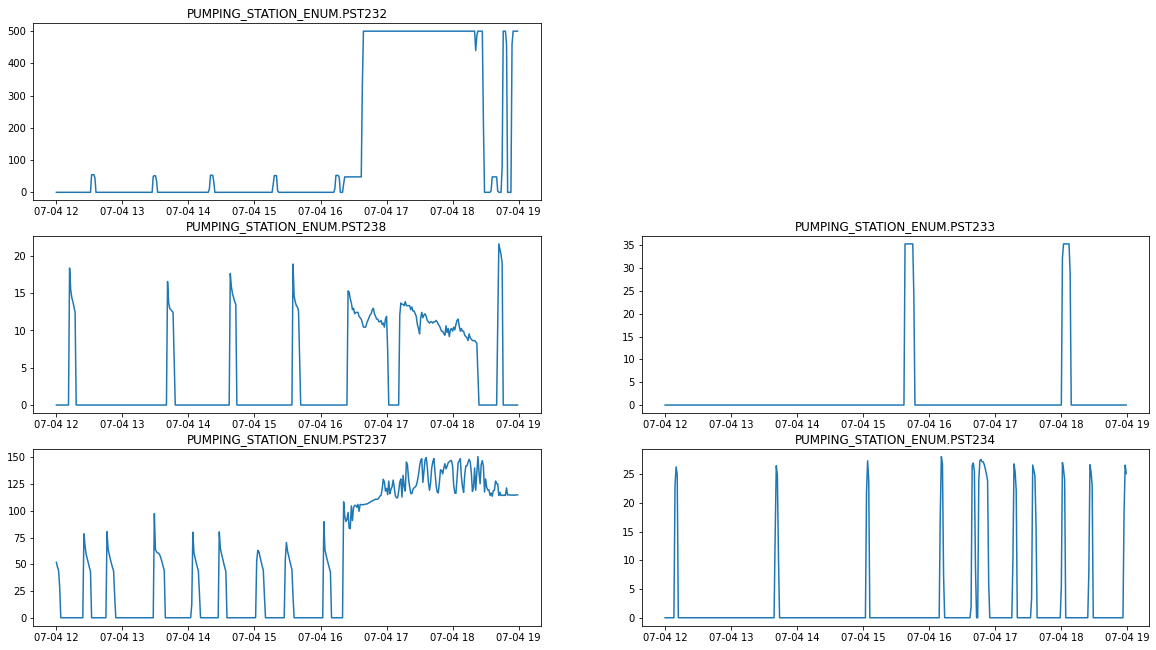

In [6]:
date_range = (df.index.month == 7) & (df.index.year == 2020) & (df.index.day == 4) & ((df.index.hour >= 12) & (df.index.hour <= 18))
pst232 = df.loc[date_range & (df.pumping_station == PS.PST232.__str__())]
pst238 = df.loc[date_range& (df.pumping_station == PS.PST238.__str__())]
pst237 = df.loc[date_range & (df.pumping_station == PS.PST237.__str__())]
pst233 = df.loc[date_range & (df.pumping_station == PS.PST233.__str__())]
pst234 = df.loc[date_range & (df.pumping_station == PS.PST234.__str__())]
pst239 = df.loc[date_range & (df.pumping_station == PS.PST239.__str__())]
plt.figure(figsize=(20, 15))
ax1 = plt.subplot(4,2,1, title=PS.PST232.__str__())
ax2 = plt.subplot(4,2,3, title=PS.PST238.__str__())
ax3 = plt.subplot(4,2,4, title=PS.PST233.__str__())
ax4 = plt.subplot(4,2,5,title=PS.PST237.__str__())
ax5 = plt.subplot(4,2,6, title=PS.PST234.__str__())
ax1.plot(pst232.index, pst232.outflow_level)
ax2.plot(pst238.index, pst238.outflow_level)
ax3.plot(pst233.index, pst233.outflow_level)
ax4.plot(pst237.index, pst237.outflow_level)
ax5.plot(pst234.index, pst234.outflow_level)


<AxesSubplot:>

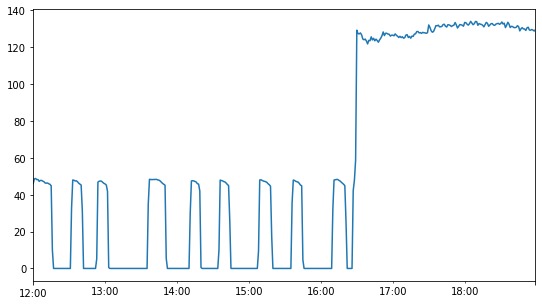

In [7]:
date_range = (df.index.month == 7) & (df.index.year == 2020) & (df.index.day == 4) & ((df.index.hour >= 12) & (df.index.hour <= 18))
df.loc[date_range & (df.pumping_station == PS.PST239.__str__())].outflow_level.plot(figsize=((9,5)))

In [11]:
df.loc[(df.pumping_station == PS.PST232.__str__())].outflow_level.value_counts()

0.000000      657077
500.000000      2518
2.160000        1555
1.800000         894
51.120000        705
               ...  
48.219564          1
48.831384          1
20.718468          1
44.765448          1
49.386324          1
Name: outflow_level, Length: 35446, dtype: int64

In [23]:
df.loc[(df.pumping_station == PS.PST232.__str__())  ]

,water_level,outflow_level,currents,current_tot,pumping_station
2020-05-01 00:00:00,1.130000,0.0,"[0.0, 0.0]",0.0,PUMPING_STATION_ENUM.PST232
2020-05-01 00:01:00,1.139577,0.0,"[0.0, 0.0]",0.0,PUMPING_STATION_ENUM.PST232
2020-05-01 00:02:00,1.150000,0.0,"[0.0, 0.0]",0.0,PUMPING_STATION_ENUM.PST232
2020-05-01 00:03:00,1.150000,0.0,"[0.0, 0.0]",0.0,PUMPING_STATION_ENUM.PST232
2020-05-01 00:04:00,1.150000,0.0,"[0.0, 0.0]",0.0,PUMPING_STATION_ENUM.PST232
...,...,...,...,...,...
2021-08-31 23:55:00,0.711921,0.0,"[0.0, 0.0]",0.0,PUMPING_STATION_ENUM.PST232
2021-08-31 23:56:00,0.718733,0.0,"[0.0, 0.0]",0.0,PUMPING_STATION_ENUM.PST232
2021-08-31 23:57:00,0.721505,0.0,"[0.0, 0.0]",0.0,PUMPING_STATION_ENUM.PST232
2021-08-31 23:58:00,0.730000,0.0,"[0.0, 0.0]",0.0,PUMPING_STATION_ENUM.PST232


In [ ]:
df.loc[(df.pumping_station == PS.PST238.__str__())]

In [ ]:
df.loc[(df.pumping_station == PS.PST232.__str__()) & (df.index.month == 1) & (df.index.year == 2021) & (df.index.day == 9)].outflow_level.plot(figsize=((9,5)))

In [ ]:
pst232 = df.loc[(df.pumping_station == PS.PST232.__str__())]
a = pst232.copy()
b = pst232.copy()
a[pst232.current_tot >= 10] = np.nan
b[pst232.current_tot < 10] = np.nan
a.outflow_level.plot(color='red')
b.outflow_level.plot(color='green')

In [ ]:
pst232.outflow_level.plot(color='red')

In [ ]:
imort math
cmath.sqrt(3) * 400 /